In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


In [2]:
# Load dataset
df = pd.read_csv('/content/electricity_bill_dataset.csv')

In [3]:
# Check for missing values
print("Missing Values:\n", df.isnull().sum())

# Basic statistics
print("\nDataset Description:\n", df.describe())

Missing Values:
 Fan                0
Refrigerator       0
AirConditioner     0
Television         0
Monitor            0
MotorPump          0
Month              0
City               0
Company            0
MonthlyHours       0
TariffRate         0
ElectricityBill    0
dtype: int64

Dataset Description:
                 Fan  Refrigerator  AirConditioner    Television       Monitor  \
count  45345.000000  45345.000000    45345.000000  45345.000000  45345.000000   
mean      13.990694     21.705458        1.503959     12.502635      2.865057   
std        5.470816      1.672575        1.115482      5.756007      3.894933   
min        5.000000     17.000000        0.000000      3.000000      1.000000   
25%        9.000000     22.000000        1.000000      7.000000      1.000000   
50%       14.000000     22.000000        2.000000     13.000000      1.000000   
75%       19.000000     23.000000        2.000000     17.000000      1.000000   
max       23.000000     23.000000        3.0000

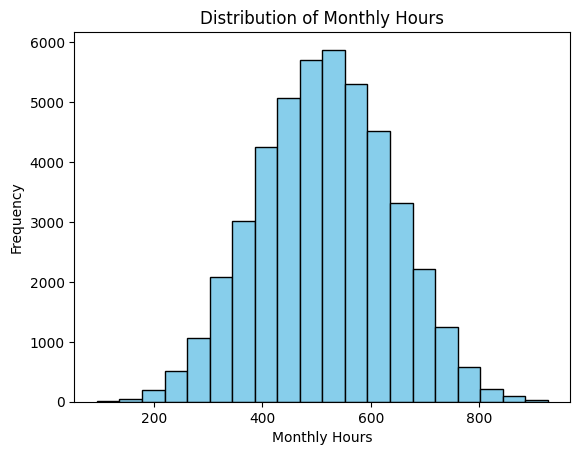

In [4]:
# Visualize data distribution
plt.hist(df['MonthlyHours'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Monthly Hours')
plt.xlabel('Monthly Hours')
plt.ylabel('Frequency')
plt.show()

In [5]:
# Select features and target column
X = df[['MonthlyHours']].values  # Feature column
y = df['ElectricityBill'].values  # Target column

In [6]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [8]:
# Predict values
y_pred = model.predict(X_test)

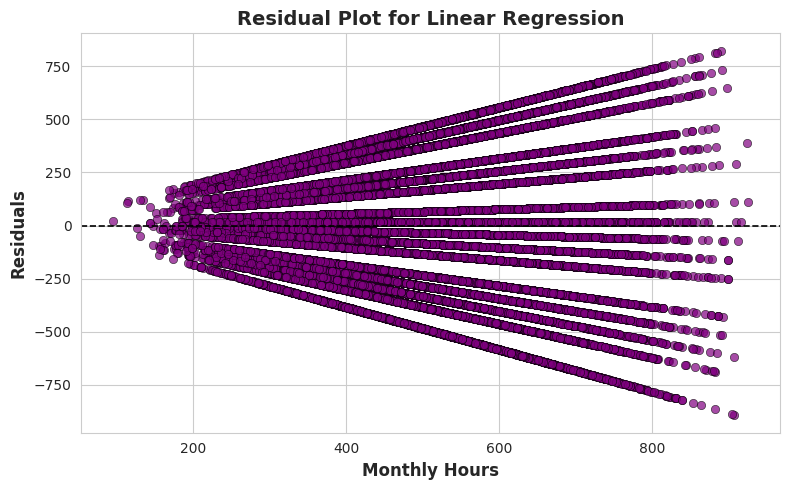

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Predict values using linear regression model
y_pred = model.predict(X)
residuals = y - y_pred

# Plot residuals
plt.figure(figsize=(8, 5))
sns.set_style("whitegrid")
sns.scatterplot(x=X.flatten(), y=residuals, color='purple', edgecolor='black', alpha=0.7)

plt.axhline(y=0, color='black', linestyle='--', linewidth=1.2)
plt.xlabel('Monthly Hours', fontsize=12, fontweight='bold')
plt.ylabel('Residuals', fontsize=12, fontweight='bold')
plt.title('Residual Plot for Linear Regression', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()



In [14]:
# Print model parameters
print(f'Intercept: {model.intercept_}')
print(f'Coefficient: {model.coef_[0]}')

Intercept: -13.280433605493272
Coefficient: 8.395145104776901


In [17]:
# Correct prediction step
y_pred = model.predict(X_test)

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'\nModel Evaluation:')
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'R-squared Score: {r2:.2f}')



Model Evaluation:
Mean Squared Error (MSE): 93728.68
Mean Absolute Error (MAE): 256.33
R-squared Score: 0.92
